# PREDICTING MOVEHUB RATING FOR CITIES#
To predict Movehub ratings for cities with the given input features, to find out which features could be relevant predictors, and to find the prediction errors. More at : http://www.movehub.com/city-rankings. 

Data courtesy : https://www.kaggle.com/blitzr/movehub-city-rankings

This project analysis is done in Python 3.6


In [1]:
#Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Load the dataset
cities = pd.read_csv('cities.csv') 
movehubqualityoflife = pd.read_csv('movehubqualityoflife.csv')
movehubcostofliving = pd.read_csv('movehubcostofliving.csv')


## Data Preprocessing

In [3]:
#Check for NAN's
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3543 entries, 0 to 3542
Data columns (total 2 columns):
City       3543 non-null object
Country    3540 non-null object
dtypes: object(2)
memory usage: 55.4+ KB


There are three NAN's. Now insert missing countries,

In [4]:
#Insertion of missing countries
cities.iloc[654,1]='Ukraine'
cities.iloc[724,1]='Russia'
cities.iloc[1529,1]='Kosovo'

In [5]:
#To make sure there isn't any more NAN:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3543 entries, 0 to 3542
Data columns (total 2 columns):
City       3543 non-null object
Country    3543 non-null object
dtypes: object(2)
memory usage: 55.4+ KB


Do same with movehubqualityoflife and movehubcostofliving

In [6]:
movehubqualityoflife.info()
movehubcostofliving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 7 columns):
City               216 non-null object
Movehub Rating     216 non-null float64
Purchase Power     216 non-null float64
Health Care        216 non-null float64
Pollution          216 non-null float64
Quality of Life    216 non-null float64
Crime Rating       216 non-null float64
dtypes: float64(6), object(1)
memory usage: 11.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 7 columns):
City                     216 non-null object
Cappuccino               216 non-null float64
Cinema                   216 non-null float64
Wine                     216 non-null float64
Gasoline                 216 non-null float64
Avg Rent                 216 non-null float64
Avg Disposable Income    216 non-null float64
dtypes: float64(6), object(1)
memory usage: 11.9+ KB


Perfect ! Lets now merge the datasets and modify indices

In [7]:
#Merge Datasets
movehubcity = pd.merge(movehubqualityoflife, movehubcostofliving, how ='outer')
#Sort Dataset by 'City'
movehubcity = movehubcity.sort_values(by='City')
#Modification of the values of the index
movehubcity.reset_index(drop = True)

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income
0,Aachen,81.64,60.55,73.25,11.69,90.52,15.34,2.05,6.88,4.26,1.33,767.23,1619.72
1,Aberdeen,81.89,49.70,82.86,34.31,76.77,24.22,1.99,6.98,5.98,1.37,1195.74,1743.78
2,Abu Dhabi,86.40,68.03,48.02,53.42,80.80,10.86,2.67,6.23,13.73,0.30,1779.93,2135.92
3,Addis Ababa,59.88,6.38,63.89,85.59,28.41,26.04,0.46,2.29,4.18,0.72,653.77,124.22
4,Adelaide,87.29,72.03,56.25,12.01,91.54,41.32,2.49,11.42,10.08,0.95,1382.26,2911.69
5,Ahmedabad,76.16,33.69,61.67,68.21,57.01,18.18,0.72,2.11,4.22,0.85,193.08,301.69
6,Alicante,82.83,44.69,75.61,28.19,72.53,44.01,1.28,6.01,4.03,1.19,511.49,852.48
7,Amman,74.40,21.22,75.37,61.63,39.57,46.74,2.55,6.54,12.79,0.83,460.92,441.94
8,Amsterdam,84.00,47.18,68.06,53.42,72.85,29.76,2.09,8.52,4.26,1.45,1513.16,1747.59
9,Antalya,71.91,22.91,59.55,30.55,40.51,44.53,1.81,3.26,5.44,1.62,217.45,362.42


Now insert column country to data and create the final dataset

In [8]:
#Insert column country to dataset and create data.
data= pd.merge(movehubcity, cities, how = 'left',on='City')
#Checking for NAN's again after merge
data.info()
data[data['Country'].isnull()]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 227
Data columns (total 14 columns):
City                     228 non-null object
Movehub Rating           228 non-null float64
Purchase Power           228 non-null float64
Health Care              228 non-null float64
Pollution                228 non-null float64
Quality of Life          228 non-null float64
Crime Rating             228 non-null float64
Cappuccino               228 non-null float64
Cinema                   228 non-null float64
Wine                     228 non-null float64
Gasoline                 228 non-null float64
Avg Rent                 228 non-null float64
Avg Disposable Income    228 non-null float64
Country                  198 non-null object
dtypes: float64(12), object(2)
memory usage: 26.7+ KB


,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Country
10,Asheville,83.17,70.51,79.02,30.55,81.34,30.21,1.80,5.88,7.85,0.64,1225.82,1898.54,NaN
51,Cebu,66.93,12.90,73.70,35.90,41.21,46.88,1.43,2.85,3.48,0.88,475.01,200.28,NaN
61,Cordoba,73.76,27.56,75.24,48.76,47.68,51.56,1.95,3.92,4.25,0.93,524.80,523.02,NaN
66,Davao,69.29,17.63,69.00,77.98,30.66,17.71,0.79,1.90,3.17,0.84,554.18,158.34,NaN
74,Dusseldorf,83.45,72.52,75.98,8.61,88.02,15.34,2.13,8.31,4.47,1.28,1193.48,2301.70,NaN
79,Frankfurt,82.75,62.60,65.33,14.54,88.04,27.55,2.13,7.67,4.07,1.36,1022.98,1875.46,NaN
81,Galway,83.19,58.59,52.97,52.47,77.85,40.78,2.13,7.67,6.39,1.39,852.48,1875.46,NaN
100,Istanbul,80.22,34.42,80.38,44.98,45.67,42.36,1.99,5.44,9.06,1.66,634.23,724.84,NaN
101,Izmir,76.07,32.12,57.33,30.55,42.90,25.91,1.81,4.71,7.25,1.69,543.63,590.57,NaN
122,Lodz,73.32,26.37,53.21,37.21,46.29,64.51,1.45,4.77,4.15,1.18,337.35,415.20,NaN


There are NAN's in Country names, needs to be corrected only for completeness.

In [9]:
#Update missing Country names
data.iloc[10,13]='United States' 
data.iloc[51,13]='Philippines'
data.iloc[61,13]='Argentina'
data.iloc[66,13]='Philippines' 
data.iloc[74,13]='Germany'
data.iloc[79,13]='Germany'
data.iloc[81,13]='Ireland'
data.iloc[100,13]='Turkey'
data.iloc[101,13]='Turkey'
data.iloc[122,13]='Poland'
data.iloc[129,13]='Spain'
data.iloc[130,13]='Scania'
data.iloc[134,13]='Spain'
data.iloc[136,13]='Colombia'
data.iloc[139,13]='United States'
data.iloc[141,13]='United States'
data.iloc[164,13]='Thailand'
data.iloc[166,13]='United States'
data.iloc[167,13]='United States'
data.iloc[168,13]='United States'
data.iloc[176,13]='Brazil'
data.iloc[178,13]='United States'
data.iloc[183,13]='United States'
data.iloc[184,13]='United States'
data.iloc[185,13]='United States'
data.iloc[188,13]='Brazil'
data.iloc[193,13]='Malta'
data.iloc[201,13]='United States'
data.iloc[224,13]='United states'
data.iloc[227,13]='Switzerland'
#Update wrong names of some of the cities
data.iloc[224,0]='Washington D.C'
data.iloc[66,0]='Davao City'

#Checking again for NAN's
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 227
Data columns (total 14 columns):
City                     228 non-null object
Movehub Rating           228 non-null float64
Purchase Power           228 non-null float64
Health Care              228 non-null float64
Pollution                228 non-null float64
Quality of Life          228 non-null float64
Crime Rating             228 non-null float64
Cappuccino               228 non-null float64
Cinema                   228 non-null float64
Wine                     228 non-null float64
Gasoline                 228 non-null float64
Avg Rent                 228 non-null float64
Avg Disposable Income    228 non-null float64
Country                  228 non-null object
dtypes: float64(12), object(2)
memory usage: 26.7+ KB


In [10]:
#Replace '' in column names by '_' and view the final dataset
data.columns = data.columns.str.replace(' ','_')

The dataset is now ready ! Let's visualize to find some inetersting patterns if any,

## Data Visualization

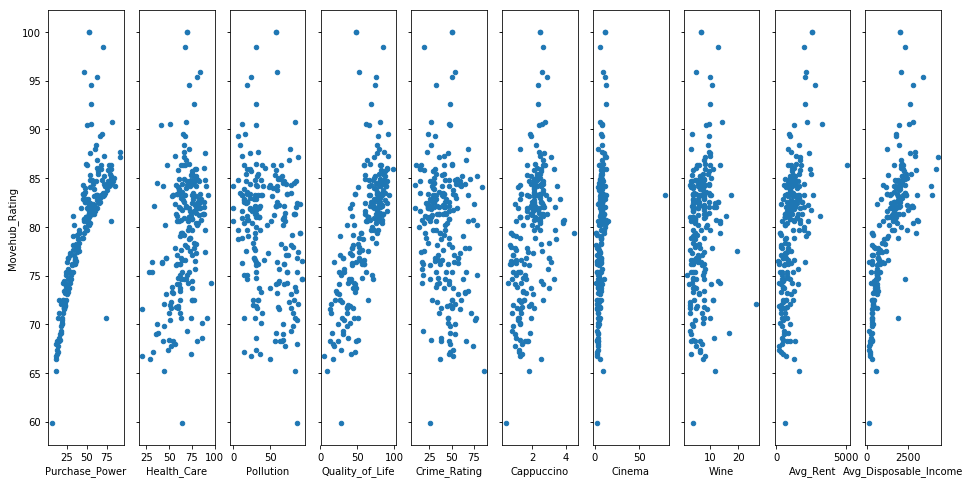

In [11]:
# visualize the relationship between the features and the response using scatterplots

fig, axs = plt.subplots(1, 10, sharey=True)
data.plot(kind='scatter', x='Purchase_Power', y='Movehub_Rating', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Health_Care', y='Movehub_Rating', ax=axs[1])
data.plot(kind='scatter', x='Pollution', y='Movehub_Rating', ax=axs[2])
data.plot(kind='scatter', x='Quality_of_Life', y='Movehub_Rating', ax=axs[3])
data.plot(kind='scatter', x='Crime_Rating', y='Movehub_Rating', ax=axs[4])
data.plot(kind='scatter', x='Cappuccino', y='Movehub_Rating', ax=axs[5])
data.plot(kind='scatter', x='Cinema', y='Movehub_Rating', ax=axs[6])
data.plot(kind='scatter', x='Wine', y='Movehub_Rating', ax=axs[7])
data.plot(kind='scatter', x='Avg_Rent', y='Movehub_Rating', ax=axs[8])
data.plot(kind='scatter', x='Avg_Disposable_Income', y='Movehub_Rating', ax=axs[9])
plt.show()

The scatter plots tell us that more or less linear variation can be assumed between variables.

Also we notice some outliers where the value of Movehub_rating < 65.00.

Lets drop them from dataset and see.

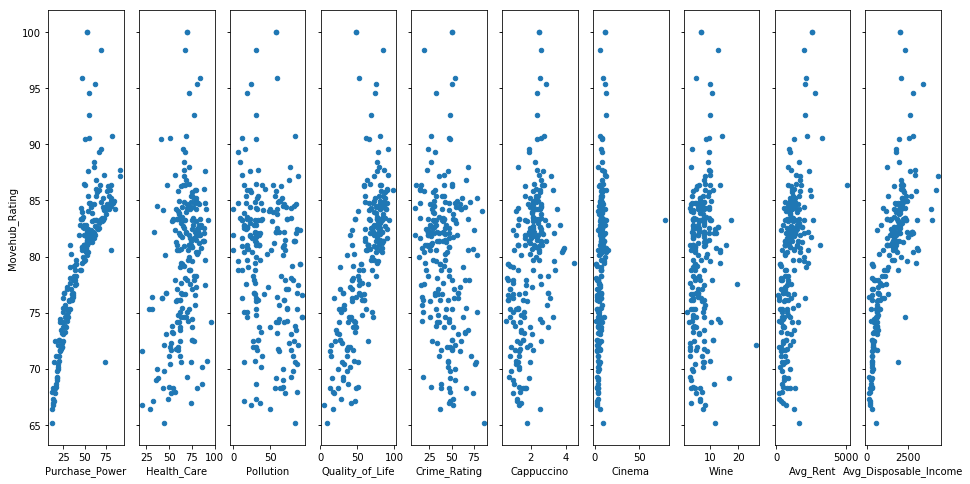

In [12]:
data = data.loc[(data['Movehub_Rating'] >= 65)]
fig, axs = plt.subplots(1, 10, sharey=True)
data.plot(kind='scatter', x='Purchase_Power', y='Movehub_Rating', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Health_Care', y='Movehub_Rating', ax=axs[1])
data.plot(kind='scatter', x='Pollution', y='Movehub_Rating', ax=axs[2])
data.plot(kind='scatter', x='Quality_of_Life', y='Movehub_Rating', ax=axs[3])
data.plot(kind='scatter', x='Crime_Rating', y='Movehub_Rating', ax=axs[4])
data.plot(kind='scatter', x='Cappuccino', y='Movehub_Rating', ax=axs[5],figsize=(16, 8))
data.plot(kind='scatter', x='Cinema', y='Movehub_Rating', ax=axs[6])
data.plot(kind='scatter', x='Wine', y='Movehub_Rating', ax=axs[7])
data.plot(kind='scatter', x='Avg_Rent', y='Movehub_Rating', ax=axs[8])
data.plot(kind='scatter', x='Avg_Disposable_Income', y='Movehub_Rating', ax=axs[9])
plt.show()

Looks fine !. Nowthat the outliers are removed, lets split the dataset.

## Splitting data into training and test sets

In [13]:
#Import 'train_test_split'
from sklearn.model_selection import train_test_split
X = data.drop(['Movehub_Rating','Country','City'], axis = 1) 
y = data['Movehub_Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Let us now create a Linear Regression Model for the dataset

## Build a Linear Regression model

In [14]:
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Lets now make predictions on the test set using the model built

In [15]:
#Making Predictions
y_pred_linear_reg = linear_reg.predict(X_test)

Now evaluate the error parameters and summary statistics

In [16]:
from sklearn.metrics import mean_squared_error
mean_squared_error=mean_squared_error(y_test, y_pred_linear_reg)

#to print summary statistics
import statsmodels.formula.api as sm
#Adding intercept trems to X_train
X_train_mod = np.append(arr = np.ones((X_train.shape[0],1)).astype(int),values = X_train,axis = 1)
regressor_OLS = sm.OLS(endog=y_train, exog=X_train_mod).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Movehub_Rating   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     57.34
Date:                Wed, 14 Jun 2017   Prob (F-statistic):           3.26e-51
Time:                        15:09:59   Log-Likelihood:                -441.65
No. Observations:                 181   AIC:                             907.3
Df Residuals:                     169   BIC:                             945.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         60.0819      2.407     24.962      0.000        55.330    64.833
x1             0.2562      0.028      9.059      0.000         0.200     0.312
x2             0.0038      0.019      0.202      0.840        -0.033     0.040
x3             0.0044      0.010      0.451      0.653        -0.015     0.024
x4             0.0341      0.025      1.343      0.181        -0.016     0.084
x5             0.0160      0.017      0.950      0.343        -0.017     0.049
x6            -0.9368      0.510     -1.838      0.068        -1.943     0.069
x7             0.2441      0.180      1.353      0.178        -0.112     0.600
x8             0.1248      0.096      1.300      0.195        -0.065     0.314
x9             2.9488      0.940      3.136      0.002         1.093     4.805
x10            0.0038      0.001      5.652      0.000         0.002     0.005
x11           -0.0022      0.001     -2.779      0.006        -0.004    -0.001
==============================================================================
Omnibus:                       39.232   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.731
Skew:                           0.634   Prob(JB):                     2.12e-45
Kurtosis:                       8.067   Cond. No.                     2.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
print("Mean Squared Error(MSE) of the test set: {:.3f} ".format(mean_squared_error))

Mean Squared Error(MSE) of the test set: 22.923 


Assuming the level of significance parameter for regression to be alpha = 0.05, some features may be insignificant, specifically x2, x3 followed by x6, x7 and x8. Let us now remove these variables and rebuild the model.

In [18]:
#Import 'train_test_split'
X = data.drop(['Movehub_Rating','Country','City','Health_Care','Pollution','Cappuccino','Cinema','Wine'], axis = 1) 
y = data['Movehub_Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [19]:
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
#Making Predictions
y_pred_linear_reg = linear_reg.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(y_test, y_pred_linear_reg)

#to print summary statistics
import statsmodels.formula.api as sm
#Adding intercept trems to X_train
X_train_mod = np.append(arr = np.ones((X_train.shape[0],1)).astype(int),values = X_train,axis = 1)
regressor_OLS = sm.OLS(endog=y_train, exog=X_train_mod).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Movehub_Rating   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     104.4
Date:                Wed, 14 Jun 2017   Prob (F-statistic):           5.15e-55
Time:                        15:09:59   Log-Likelihood:                -444.19
No. Observations:                 181   AIC:                             902.4
Df Residuals:                     174   BIC:                             924.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         61.5289      1.665     36.965      0.000        58.244    64.814
x1             0.2505      0.027      9.231      0.000         0.197     0.304
x2             0.0283      0.023      1.232      0.220        -0.017     0.074
x3             0.0130      0.017      0.783      0.434        -0.020     0.046
x4             2.7088      0.737      3.678      0.000         1.255     4.163
x5             0.0040      0.001      6.402      0.000         0.003     0.005
x6            -0.0019      0.001     -2.826      0.005        -0.003    -0.001
==============================================================================
Omnibus:                       44.210   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.370
Skew:                           0.777   Prob(JB):                     3.82e-48
Kurtosis:                       8.152   Cond. No.                     1.66e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
print("Mean Squared Error(MSE) of the test set: {:.3f} ".format(mean_squared_error))


Mean Squared Error(MSE) of the test set: 19.404 


The MSE for test set now shows a slight decrease of 3.518. 

Let us now employ another algorithm i.e Support Vector Regression. Since the data is linear in nature, we will use a Linear kernel.

## Build a Support Vector Regression model and make predictions

In [23]:
X = data.drop(['Movehub_Rating','Country','City'], axis = 1) 
y = data['Movehub_Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
from sklearn.svm import SVR
regressor = SVR(kernel ='linear')
regressor.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [25]:
y_pred_SVR = regressor.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(y_test, y_pred_SVR)

In [27]:
print("Mean Squared Error(MSE) of the test set: {:.3f} ".format(mean_squared_error))

Mean Squared Error(MSE) of the test set: 21.480 


## Concluding Remarks

1. The test MSE for the Linear Regression model shows a rate of 22.923, upon including all unput features. Eliminating insignificant features could reduce the test MSE of the same only to 19.404.
2. An equivalent linear model but with Support Vectors showed a test MSE of 21.480, in a comparable range with Linear Regression.
3. Cross-validation techniques can be applied to further optimize the hyperparameters of the model.